In [1]:
%matplotlib notebook

In [2]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [3]:
#load in CSV files
mouse_data_file = "Resources/Mouse_metadata.csv"
study_results_file = "Resources/Study_results.csv"

#read data files
mouse_data_df = pd.read_csv(mouse_data_file)
study_results_df = pd.read_csv(study_results_file)

In [4]:
#combine data into single dataset
combined_mouse_df = pd.merge(mouse_data_df, study_results_df, on = "Mouse ID", how="outer")

combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#check number of mice
mice_total = len(combined_mouse_df)
unique_mice = combined_mouse_df["Mouse ID"].value_counts()

#get duplicate mice g989
duplicate_mice = combined_mouse_df[combined_mouse_df.duplicated(subset = ["Mouse ID","Timepoint"], keep=False)]

#drop duplicate mice from data
clean_mouse_df = combined_mouse_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#bonus, get data for g998

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create groupby for drug regimen
grouped_drug = clean_mouse_df.groupby(["Drug Regimen"])

#calculate mean of tumor volume
tumor_mean = grouped_drug["Tumor Volume (mm3)"].mean()

#calculate median of tumor volume
tumor_median = grouped_drug["Tumor Volume (mm3)"].median()

#calculate variance
tumor_variance = grouped_drug["Tumor Volume (mm3)"].var()

#calculate standard deviation
tumor_sd = grouped_drug["Tumor Volume (mm3)"].std()

#calculate SEM
tumor_sem = grouped_drug["Tumor Volume (mm3)"].sem()

#create summary data frame
volume_summary_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance,
                                 "Standard Deviation": tumor_sd, "Standard Error": tumor_sem})
volume_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<IPython.core.display.Javascript object>


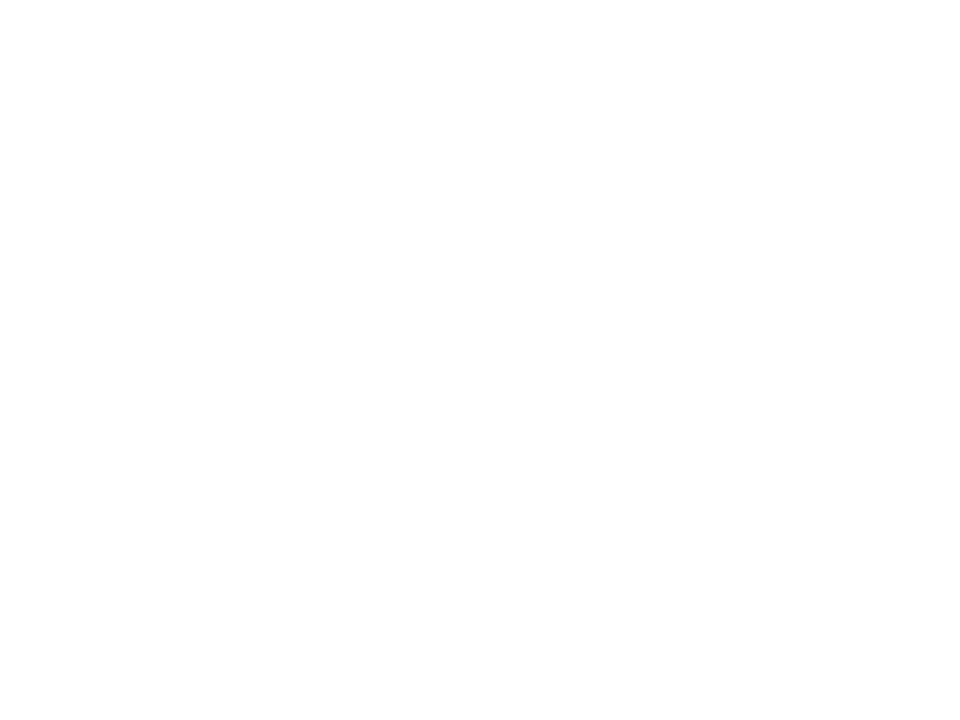

In [8]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#calculate total number of measurements for each drug regimen and create data frame
total_measurements = grouped_drug["Drug Regimen"].count()
drug_total_df = pd.DataFrame({"Total Measurements": total_measurements})

#set up bar chart
drug_total_df.plot(kind="bar")

# Set a title for the chart
plt.title("Total Measurements Per Drug Regimen")
plt.ylabel("Total Measurements")

plt.show()
plt.tight_layout()


In [9]:
plt.close()

<IPython.core.display.Javascript object>


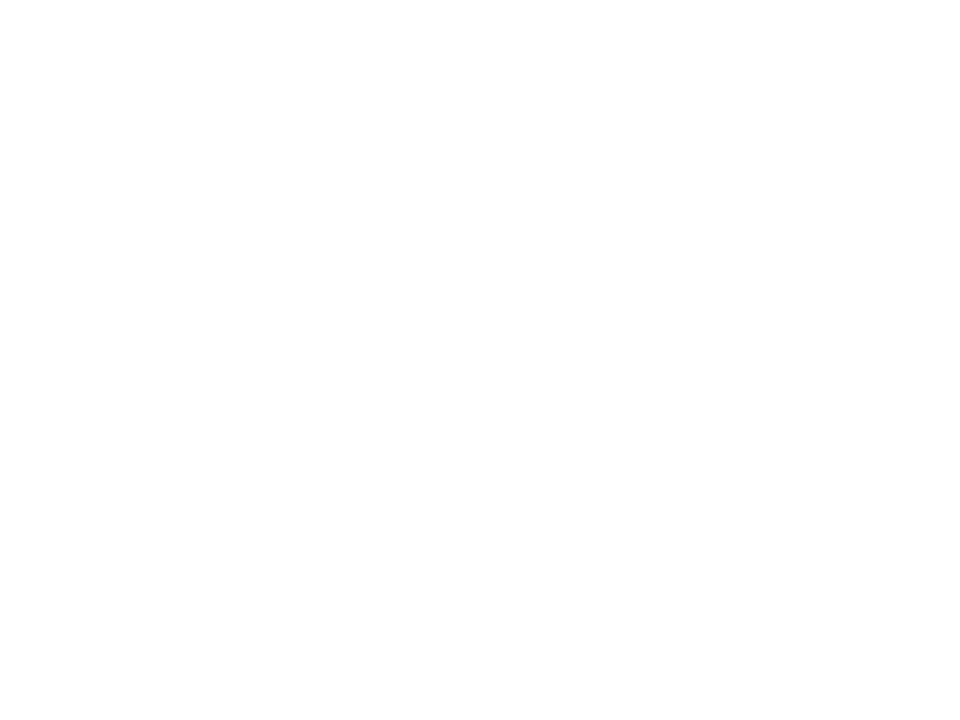

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#set up parameters for bar chart
x_axis = np.arange(len(total_measurements))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
                           "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

#plot bar chart
plt.bar(x_axis, total_measurements, color='r', alpha=0.5, align="center")

# Set a Title and labels
plt.title("Total Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")

#set figure size
plt.tight_layout()

plt.show()

In [11]:
plt.close()

<IPython.core.display.Javascript object>


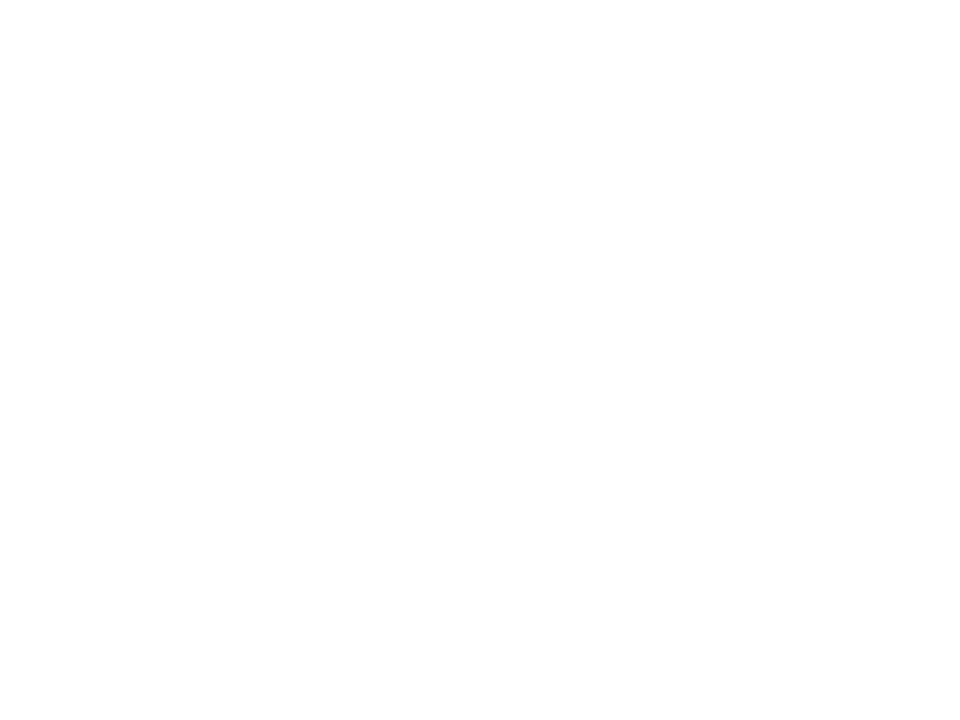

(-1.1179900164988374,
 1.1067252436799584,
 -1.1132609815137346,
 1.1081858927805142)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#use groupby to calculate total of female/male mice
mice_group = clean_mouse_df.groupby(["Sex"])
total_mice = mice_group["Sex"].count()

#summary data frame of female/male mice
mice_sex_df = pd.DataFrame({"Total":total_mice})

#set up pie plot
mice_pie = total_mice.plot(kind = "pie", y= total_mice, title= "Female vs Male Mice", 
                           colors= ["pink","blue"],startangle=140, autopct="%1.1f%%")
mice_pie.set_ylabel("Total Mice")

plt.show()
plt.axis("equal")

In [13]:
plt.close()

<IPython.core.display.Javascript object>


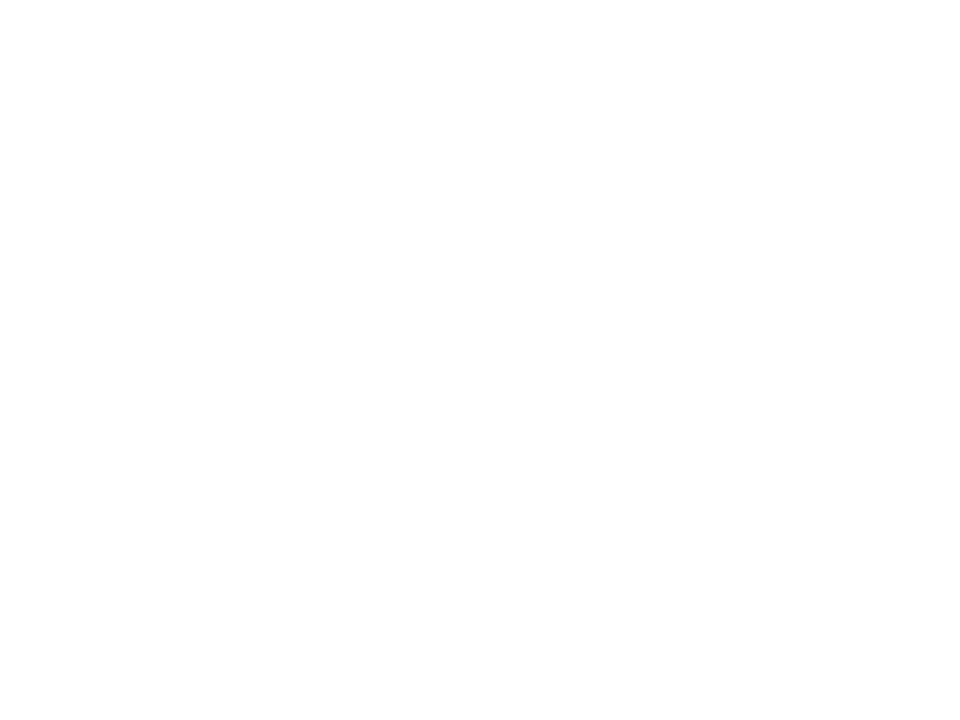

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#set up parameters for pie plot
colors = ["lightcoral", "lightblue"]
plt.pie(total_mice, colors=colors,
        autopct="%1.1f%%", startangle=140)

#give the chart a title
plt.title("Female vs Male Mice")
plt.ylabel("Total Mice")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

In [15]:
plt.close()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#groupby mouse id
max_timepoint_df = clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()

#reset index so merge works
max_timepoint_df = max_timepoint_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint_df = max_timepoint_df.merge(clean_mouse_df, on=["Mouse ID", "Timepoint"])

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_regimens:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_timepoint_df.loc[merged_timepoint_df["Drug Regimen"] == treatment]
    
    #pull out just volume data
    tumor_vol = treatment_data["Tumor Volume (mm3)"]
    
    # add subset to our tumor_data list
    tumor_vol_data.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    #do this on drug_vol, get that block of code where we did outliers
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volumes for mice on {treatment} is: {lowerq}")
    print(f"The upper quartile of tumor volume for mice on {treatment} is: {upperq}")
    print(f"The interquartile range of tumor volume for mice on {treatment} is: {iqr}")
    print(f"The the median of tumor volume for mice on {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("------------------------------------------")

The lower quartile of tumor volumes for mice on Capomulin is: 32.37735684
The upper quartile of tumor volume for mice on Capomulin is: 40.1592203
The interquartile range of tumor volume for mice on Capomulin is: 7.781863460000004
The the median of tumor volume for mice on Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------
The lower quartile of tumor volumes for mice on Ramicane is: 31.56046955
The upper quartile of tumor volume for mice on Ramicane is: 40.65900627
The interquartile range of tumor volume for mice on Ramicane is: 9.098536719999998
The the median of tumor volume for mice on Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------
The lower quartile of tumor volumes for mice on Infubinol is: 54.04860769
The upper quartile of tumor volume for mice on 

<IPython.core.display.Javascript object>


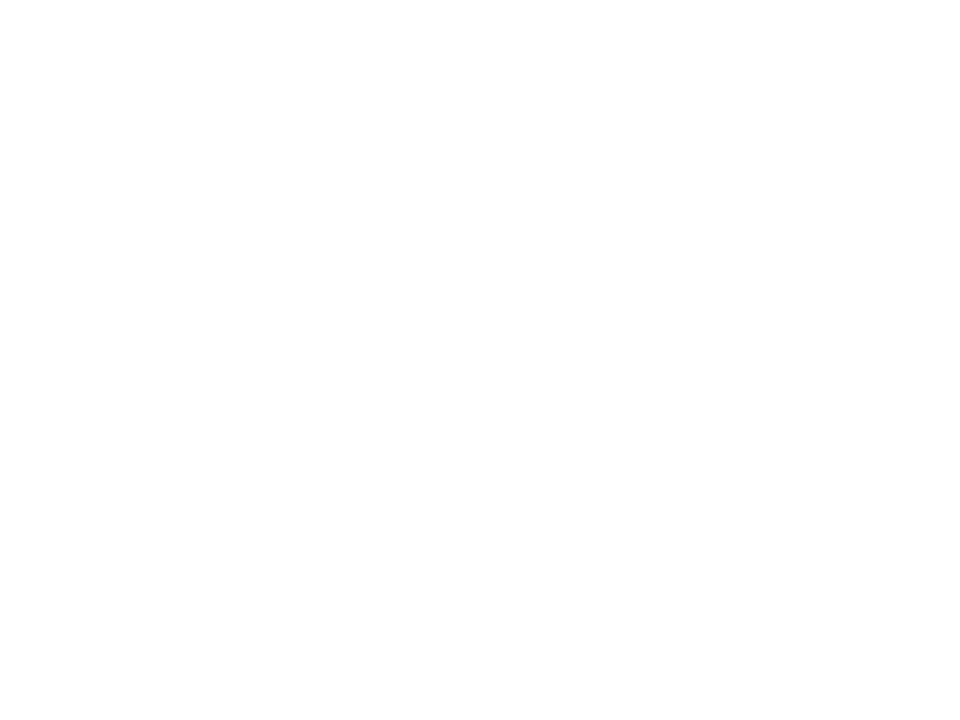

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Treatment')
ax.set_ylabel('Tumor Volume')
ax.boxplot(tumor_vol_data, labels=treatment_regimens, sym='b')
plt.show()


In [19]:
plt.close()

<IPython.core.display.Javascript object>


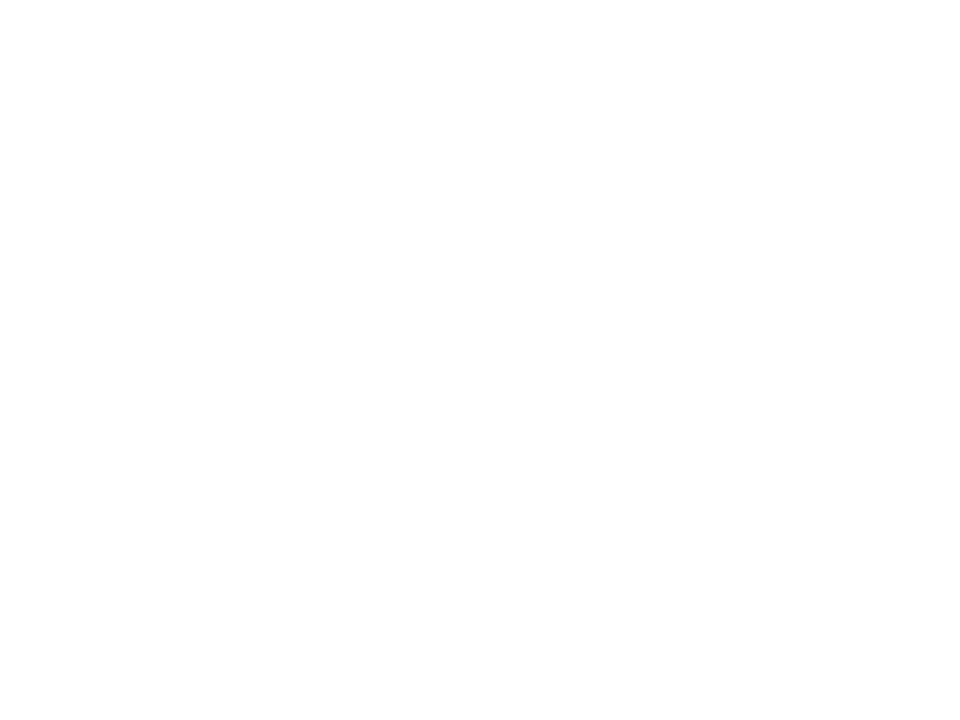

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#I chose Mouse ID i738 

#create dataframe of chosen mouse with .loc for the mouse you want
chosen_mouse_df = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "i738"]

#create line plot x-axis timepoint, y-axis tumor volume
x_axis_data = chosen_mouse_df["Timepoint"]
volume_data = chosen_mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis_data, volume_data)

#give graph axis titles
plt.title("Capomulin Treatement of Mouse I738")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [21]:
plt.close()

<IPython.core.display.Javascript object>


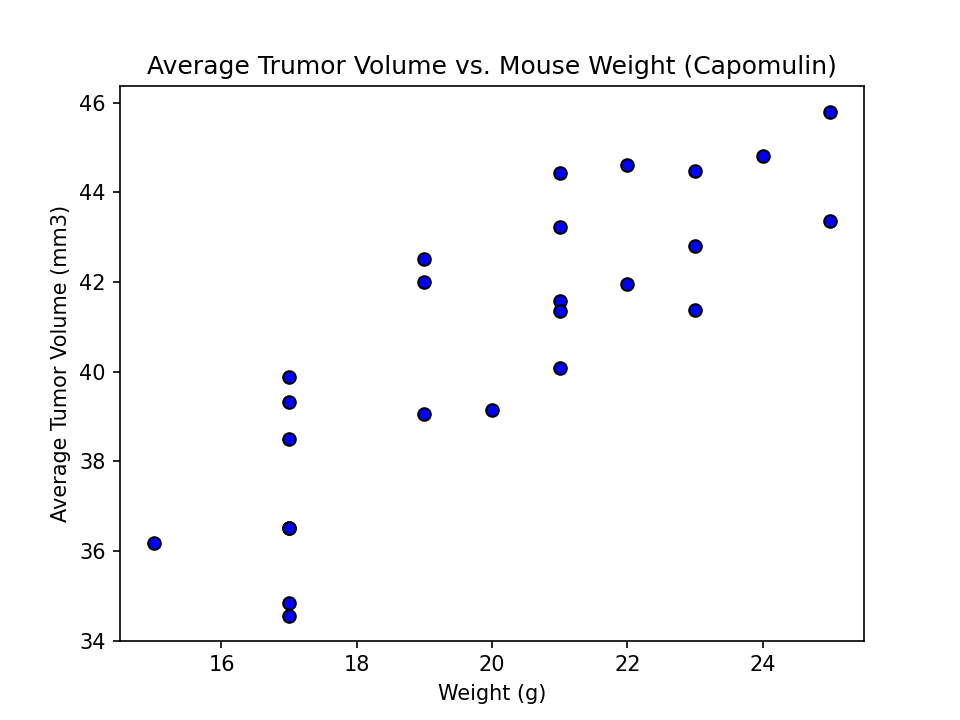

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#do a general plt.scatter on Capomulin

#create a dataframe for all mice treated with Capomulin
capomulin_mice_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin"]

#use a .groupby to get the average tumor volume and average weight
capomulin_group = capomulin_mice_df.groupby(["Mouse ID"])
avg_tumor_vol = capomulin_group["Tumor Volume (mm3)"].mean()
capomulin_weight = capomulin_group["Weight (g)"].mean()

#create a scatter plot using weight and average tumor volume Weight (g)
plt.scatter(capomulin_weight, avg_tumor_vol, facecolors="blue", edgecolors="black")
plt.title("Average Trumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [47]:
plt.close()

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#using st.pearsonr (from activity) with same variables as above